## Принятие решений в бизнесе на основе данных в крупном интернет-магазине

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Цель проекта:**

Приоритизировать гипотезы. По результатам всей работы решить, остановить или продолжить тест. 

**Ход проекта:**

Все необходимые данные получим из файлов `hypothesis.csv`, `orders.csv` и `visitors.csv`. Нам понадобится загрузить эти файлы, ознакомиться с таблицами и выяснить, правильные ли в них типы данных, а также проверить наличие пропусков. Затем займемся приоритизацией гипотез, а также анализом A/B-теста. В итоге нужно будет принять решение по результатам теста и объяснить его.

Таким образом, работа над проектом пройдёт в четыре шага:

1. Загрузка, ознакомление и предобработка данных.
2. Приоритизация гипотез.
3. Анализ A/B-теста.
4. Общий вывод.

⚠️

Импортируем сразу же нужные библиотеки, затем в процессе будем добавлять при необходимости и другие:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import datetime as dt

### 1. Загрузка, ознакомление и предобработка данных

Начнем работу с загрузки данных из файлов. Ознакомимся с данными, а также проверим, нужно ли перевести какие-то столбцы в другой тип данных. 

Загрузим все файлы из папки `/datasets` по очереди и сохраним их в переменные:
- `hypothesis.csv` сохраним в `hypothesis`;
- `orders.csv` сохраним в `orders`;
- `visitors.csv` сохраним в `visitors`.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Посмотрим сначала на таблицу `hypothesis`, затем выведем случайные десять строк остальных таблиц по очереди, чтобы взглянуть на данные впервые и сразу в разных местах. Для этого вызовем функцию `sample()`. Затем сразу же познакомимся с данными при помощи вызова info(), изучим их. В том числе посмотрим типы данных и количество столбцов:

In [3]:
pd.set_option('max_colwidth', 110)
hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


С таблицей `hypothesis` все в порядке, типы данных правильные и нет пропусков. Всего в таблице 5 столбцов. Типы данных: `int` и `object`. Согласно документации к данным:
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение, тем дороже проверка гипотезы.

In [4]:
orders.info()
orders.sample(n = 10, random_state = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
886,51443164,4278982564,2019-08-05,24744,A
1093,3894437543,276558944,2019-08-12,5050,A
801,504373597,2604012846,2019-08-05,890,B
189,4189935502,1648269707,2019-08-17,290,B
808,2344401705,366673373,2019-08-05,1460,A
480,1954636284,2600415354,2019-08-06,1530,B
202,532398042,1306302251,2019-08-23,1498,A
311,3567356314,3077396270,2019-08-24,4195,B
866,707525727,1270030113,2019-08-30,3290,B
752,237002862,1398592185,2019-08-20,390,A


В таблице `orders` пропусков нет, но в столбце `date` неправильный тип данных. Исправим это.

In [5]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Всего в таблице 5 столбцов. Типы данных: `int`, `date` и `object`. Согласно документации к данным:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

In [6]:
visitors.info()
visitors.sample(n = 10, random_state = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
21,2019-08-22,A,609
52,2019-08-22,B,650
38,2019-08-08,B,654
24,2019-08-25,A,621
2,2019-08-03,A,507
41,2019-08-11,B,721
60,2019-08-30,B,490
50,2019-08-20,B,560
35,2019-08-05,B,707
44,2019-08-14,B,746


В таблице `visitors` пропусков нет, но в столбце `date` неправильный тип данных. Исправим это.

In [7]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Всего в таблице 3 столбца. Типы данных: `int`, `date` и `object`. Согласно документации к данным:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

**Вывод по шагу:**

Мы загрузили необходимые файлы, ознакомились с данными в них и провели первичную предобработку там, где это было необходимо. Добавили описание из документации для понимания содержания в таблицах. Выяснили, что пропусков нет, а неправильные типы данных в двух таблицах заменили на правильные. Возможно, что неправильный тип данных образовался в результате какой-то технической ошибки при сохранении данных в исходный формат файла. 

Благодаря этим действиям мы подготовились к дальнейшем действиям в рамках проекта. 

### 2. Приоритизация гипотез

В этом шаге мы выполним сразу 3 задачи:
- применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета;
- применим фреймворк RICE для приоритизации гипотез отсортируем их по убыванию приоритета;
- выясним и объясним в выводе, как изменилась приоритизация гипотез при применении RICE вместо ICE. 

In [8]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by = 'ICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [9]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values(by = 'RICE', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


**Вывод по шагу:**

Есть различия в обеих таблицах, но какие-то гипотезы находятся примерно в одном месте. К примеру, гипотезы 1, 4 и 5 на обеих таблицах в нижней части, а 6 и 7 на обеих таблицах в верхей части.

По фреймворку ICE в лидерах гипотезы - 8, 0 и 7, а по фреймворку RICE - 7, 2 и 0. Разница серьезная. Это связано с тем, что по фреймворку ICE мы не учитываем Reach, то есть скольких пользователей затронет изменение, которое мы хотим внести. Параметр очень важный для оценки гипотез, поэтому на него обязательно нужно ориентироваться. 

В связи с этим, наиболее приоритетными гипотезами для нас будут - 7 и 2. Именно в этих гипотезах Reach составляет 10 и 8 баллов соответственно. 

### 3. Анализ A/B-теста

Теперь мы приступим к анализу A/B-теста, результаты которого хранятся в файлах `orders.csv` и `visitors.csv`. В рамках анализа будем строить различные графики и производить расчеты.

Проверим пользователей, которые могут находиться в обеих группах одновременно. 

In [10]:
duplicated_users = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
print('Количество пользователей, которые находятся в обеих группах:', duplicated_users['groups'].count())

Количество пользователей, которые находятся в обеих группах: 58


В идеале подобной ситуации не должно быть, так как файл уже должен содержать в себе правильные выборки. В этом случае доля пересекающихся пользователей менее 5%, поэтому делать с ними ничего не будем.

#### 3.1 График кумулятивной выручки по группам

Посчитаем усредненную выручку за день в каждой группе, чтобы иметь представление о том, какая выручка за день.

In [11]:
orders.groupby(['date', 'group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

Создадим таблицу `cumulativeData` с куммулятивными данными по обеим таблицам.

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis = 1).sort_values(by = ['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.sample(n = 5, random_state = 1)

,date,group,orders,buyers,revenue,visitors
21,2019-08-11,B,241,228,1592513,6998
52,2019-08-27,A,495,449,3514698,16376
38,2019-08-20,A,362,330,2469529,12204
24,2019-08-13,A,244,223,1826511,8323
2,2019-08-02,A,44,38,242401,1338


Построим график кумулятивной выручки по группам.

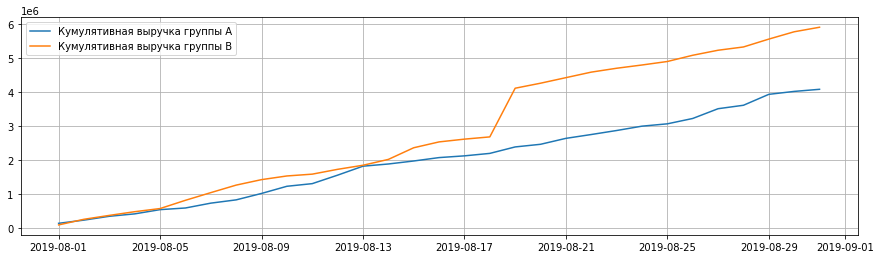

In [13]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
plt.figure(figsize = (15,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'Кумулятивная выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'Кумулятивная выручка группы B')
plt.legend()
plt.grid()
plt.show()

Группа B стабильно показывает бОльшую выручку, чем группа А. По началу выручка не так сильно различалась, но во второй половине месяца выручка группы B резко подскочила и имела большой отрыв от группы А. 

19 августа скорее всего был крупный заказ, хотя по графику однозначно сказать нельзя, может это просто увеличилось количество заказов. Посмотрим на заказы между 17 и 21 августа. 

In [14]:
cumulativeRevenueB.query('"2019-08-17" <= date <= "2019-08-21"')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


Предположение с резко возросшим количеством заказов не подтвердилось, ибо их количество умеренно растет изо дня в день. Тогда отсортируем заказы от 19 августа по убыванию.

In [15]:
orders.query('date == "2019-08-19"').sort_values(by = 'revenue', ascending = False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B


Действительно, есть всего один заказ почти на 1.3 млн., который резко выбивается от остальных, поэтому его можно считать выбросом и учитывать это при дальнейшем анализе. 

#### 3.2 График кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов.

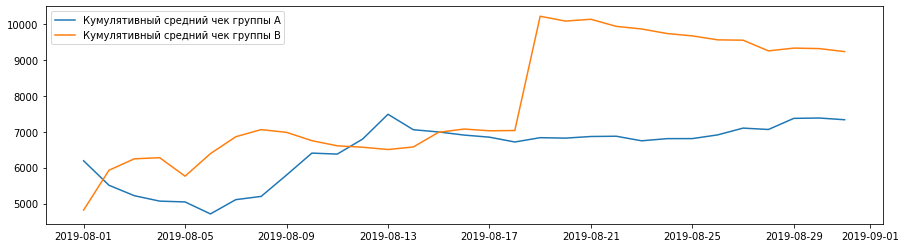

In [16]:
plt.figure(figsize=(15,4))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
         label = 'Кумулятивный средний чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
         label = 'Кумулятивный средний чек группы B')
plt.legend()
plt.grid()
plt.show()

Есть некоторая схожесть с графиком кумулятивной выручки, так как во второй половине месяца группа B снова резко вырывается вперед, но только уже по кумулятивному среднему чеку. Интересно то, что после большого заказа кумулятивный средний чек группы B начал постепенно снижаться, в то время как у группы А стабильно расти. 

#### 3.3 График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

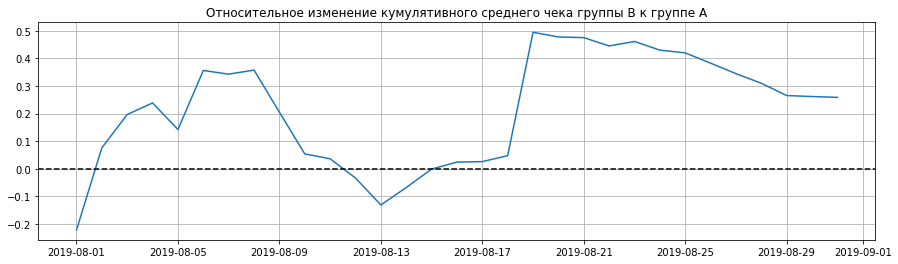

In [17]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])

plt.figure(figsize = (15,4))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / \
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.show()

Посколько этот график является производным от предыдущего, то и вывод в бОльшей степени будет таким же. Во второй половине месяца группа B резко вырывается вперед по кумулятивному среднему чеку. После большого заказа кумулятивный средний чек группы B начал постепенно снижаться, в то время как у группы А стабильно расти, поэтому со временем они могли бы пересечься. 

#### 3.4 График кумулятивной конверсии по группам

Построим и проанализируем график кумулятивной конверсии по группам. 

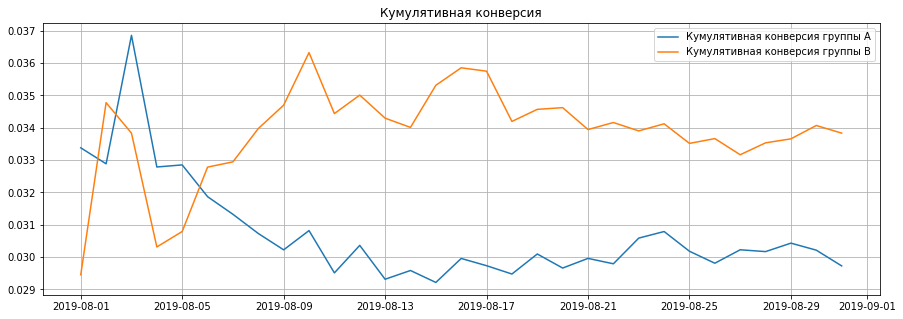

In [18]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'Кумулятивная конверсия группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'Кумулятивная конверсия группы B')
plt.title('Кумулятивная конверсия')
plt.legend()
plt.grid()
plt.show()

В начале месяца конверсия группы А была больше группы B, почти постоянно с 1 по 5 августа. 3 августа была максимальной за весь период наблюдения. Затем началось резкое падение и после 9 августа волантильность конверсии была вполне стабильной и примерно на одном уровне - 0.025 - 0.31. 

Конверсия группы B с 4 августа резко пошла вверх и уже 6 августа обогнала конверсию группы A. Рост был вплоть до 10 августа, затем также возникла вполне стабильная волантильность примерно на одном уровне - 0.033 - 0.036. 

Можно сделать вывод, что конверсия группы B в целом значительно больше конверсии группы А.

#### 3.5 График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

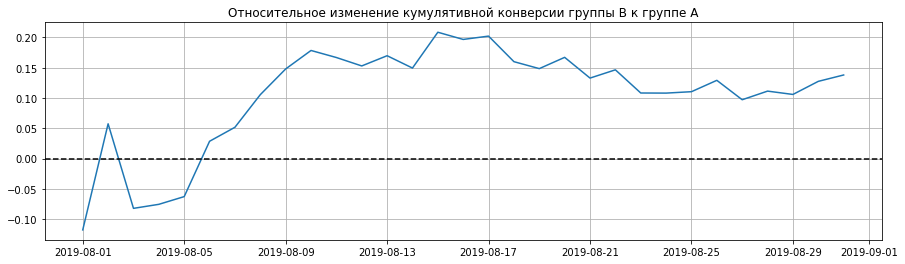

In [19]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
plt.figure(figsize = (15,4))
plt.grid()
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.axhline(y = 0, color = 'black', linestyle = '--') 
plt.show()

Посколько этот график является производным от предыдущего, то и вывод в бОльшей степени будет таким же. В начале месяца конверсия группы А была больше группы B, почти постоянно с 1 по 5 августа. Затем началось резкое падение и после 9 августа волантильность конверсии была вполне стабильной.

Конверсия группы B с 4 августа резко пошла вверх и уже 6 августа обогнала конверсию группы A. Рост был вплоть до 10 августа, затем также возникла вполне стабильная волантильность.

Вывод такой же - конверсия группы B в целом значительно больше конверсии группы А.

#### 3.6 Точечный график количества заказов по пользователям

Построим точечный график количества заказов по пользователям. 

In [20]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis = 1).groupby('visitorId', as_index = False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by = 'orders', ascending = False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


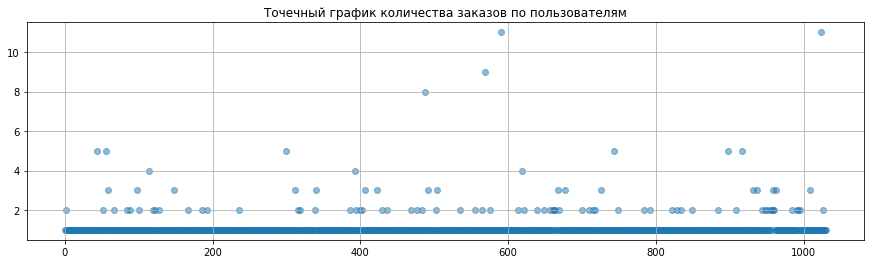

In [21]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize = (15,4))
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.5)
plt.show()

Подавляющее число пользователей сделали всего 1 заказ, а тех, кто совершил 2 заказа, уже намного меньше, это явно прослеживается на графике. Совсем мало тех, кто совершил 3 заказа, но пока непонятно, стоит ли это считать выбросами. Явно стоит считать выбросами тех, кто совершил более 4 заказов. Необходимо посчитать процентили, чтобы решить окончательно. 

#### 3.7 Граница для определения аномальных пользователей 

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Затем выберем границу для определения аномальных пользователей.

In [22]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print('Перцентили:\n95: {}\n99: {}'.format(percentiles[0], percentiles[1]))

Перцентили:
95: 2.0
99: 4.0


Теперь окончательно понятно, что больше 2-х заказов совершают всего 5% пользователей, поэтому их можно считать аномалией. Это и будет границей.

#### 3.8 Точечный график стоимостей заказов

Построим точечный график стоимостей заказов.

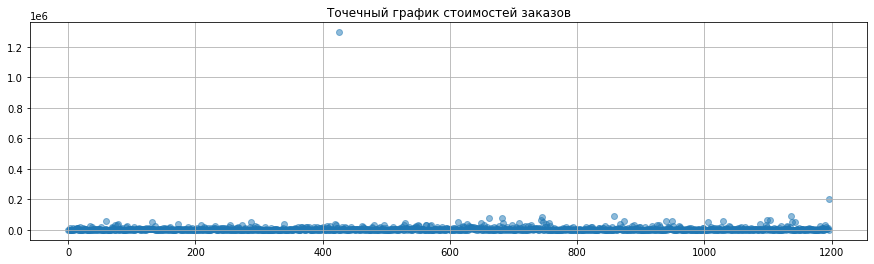

In [23]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize = (15,4))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha = 0.5)
plt.show()

Большой выброс мешает наглядно посмотреть на график, поэтому уберем все, что выше 100 000. 

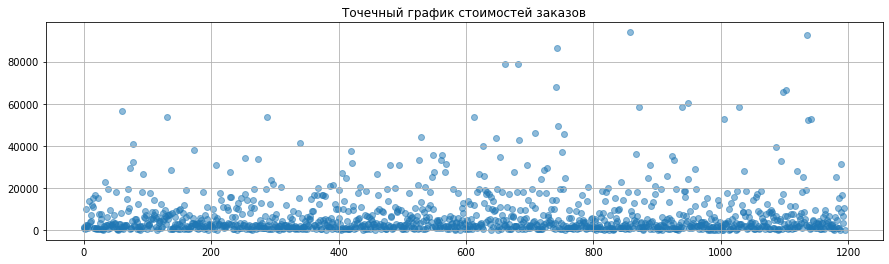

In [24]:
orders_n = orders[orders['revenue'] <= 200000]['revenue']
x_n_values = pd.Series(range(0, len(orders_n)))
plt.figure(figsize = (15,4))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.scatter(x_n_values, orders_n, alpha = 0.5)
plt.show()

Есть аномальные стоимости заказов, но большинство не более 100 тыс. Необходимо определить точную границу, для этого снова обратимся к расчету процентилей. 

#### 3.9 Граница для определения аномальных заказов

Посчитаем 95-й и 99-й перцентили сумм заказов на пользователя. Затем выберем границу для определения аномальных пользователей.

In [25]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('Перцентили:\n95: {:.0f}\n99: {:.0f}'.format(percentiles[0], percentiles[1]))

Перцентили:
95: 28000
99: 58233


Теперь окончательно понятно, что заказы стоимостью свыше 58 233 совершают всего 1% пользователей, поэтому их можно считать аномалией. Это и будет границей.

#### 3.10 Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Соберем все данные по заказам и визитам, а также кумулятивные показатели в одну таблицу. Для этого создадим несколько таблиц и затем объединим их.

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis = 1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index = False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index = False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis = 1).sort_values(by = ['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [27]:
data = ordersADaily.merge(ordersBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')
data.sample(n = 5, random_state = 1)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
27,2019-08-28,17,101122,28,96008,512,3615820,576,5328268,594,654,16970,17177
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
19,2019-08-20,12,77619,20,147274,362,2469529,423,4263815,575,560,12204,12218
23,2019-08-24,15,127703,16,95506,441,3002070,493,4798722,395,378,14322,14448
22,2019-08-23,25,117788,15,113969,426,2874367,477,4703216,468,546,13927,14070


Применим «U-критерий Манна-Уитни». 

Формируем гипотезы:
- H0 — статистически значимых различий в конверсии между группами по «сырым» данным нет;
- H1 — статистически значимые различия в конверсии между группами по «сырым» данным есть.

In [28]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId',
                                                        as_index = False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId',
                                                        as_index = False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name = 'orders')], axis = 0)

print('alpha =', 0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print('Относительный показатель B и A = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель B и A = 0.138


Нулевую гипотезу отвергаем, так как p-value = 0.017, что меньше 0.05. Различия в конверсии между группами по «сырым» данным есть, а относительный выигрыш группы B над A = 13.8%.

#### 3.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Применим «U-критерий Манна-Уитни». 

Формируем гипотезы:
- H0 — статистически значимых различий в средних чеках между группами по «сырым» данным нет;
- H1 — статистически значимые различия в средних чеках между группами по «сырым» данным есть.

In [29]:
print('alpha =', 0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                                                    orders[orders['group'] == 'B']['revenue'], alternative = 'two-sided')[1]))
print('Относительный показатель B и A = {0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() /
                                                        orders[orders['group'] == 'A']['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель B и A = 0.259


Нулевую гипотезу не отвергаем, так как p-value = 0.729, что значительно больше 0.05. Различий в средних чеках между группами по «сырым» данным нет, а средний чек группы B значительно выше среднего чека группы A, примерно на 26%. 

#### 3.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным

Ранее мы определили границы аномальных пользователей:
- кто совершил больше 2-х заказов;
- кто совершил заказ дороже 58233.

In [30]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Всего аномальных пользователей:', abnormalUsers.count())

Всего аномальных пользователей: 31


Подготовим выборки количества заказов по пользователям по группам теста:

In [31]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name = 'orders')], axis = 0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name = 'orders')], axis = 0) 

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Применим «U-критерий Манна-Уитни». 

Формируем гипотезы:
- H0 — статистически значимых различий в конверсии между группами по «очищенным» данным нет;
- H1 — статистически значимые различия в конверсии между группами по «очищенным» данным есть.

In [32]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительный показатель B и A = {0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean()-1))

alpha = 0.05
p-value = 0.010
Относительный показатель B и A = 0.174


Нулевую гипотезу отвергаем, так как p-value = 0.010, что меньше 0.05. Различия в конверсии между группами по «очищенным» данным есть, а относительный выигрыш группы B над A = 17,4%. Выше, чем по «сырым» данным - 13.8%.

#### 3.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Применим «U-критерий Манна-Уитни». 

Формируем гипотезы:
- H0 — статистически значимых различий в средних чеках между группами по «очищенным» данным нет;
- H1 — статистически значимые различия в средних чеках между группами по «очищенным» данным есть.

In [33]:
print('alpha =',0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))
print('Относительный показатель B и A = {0:.3f}'.format(
    orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / 
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

alpha = 0.05
p-value = 0.798
Относительный показатель B и A = -0.020


Нулевую гипотезу не отвергаем, так как p-value = 0.798, что значительно больше 0.05. Различий в средних чеках между группами по «очищенным» данным нет, как и по «сырым» данным. При этом теперь средний чек группы B оказался незначительно ниже среднего чека группы A, а именно на 2%. Напомним, что по «сырым» данным он был больше примерно на 26%. Все из-за того аномального заказа на 1.3 млн. 

**Вывод по шагу:**

По результатам анализа выявили:
- по «сырым» и по «очищенным» данным различия в конверсии групп B и A есть;
- относительный выигрыш группы B над равен 13.8% по «сырым» данным и 17,4% «очищенным»;
- по «сырым» и по «очищенным» данным различия в средних чеках групп B и A отсутствуют, несмотря на то, что средний чек группы B оказался на 2% ниже среднего чека группы A по «очищенным» данным, в то время как по «сырым» данным он был больше примерно на 26%. Все из-за того аномального заказа на 1.3 млн. 

Результат вполне однозначен. Мы можем принять решение об остановке теста и зафиксировать победу группы B, так как она лучше группы A по конверсии, хоть и по среднему чеку они примерно равны. 

### 4. Общий вывод

Мы закончили проект, соблюдая ход проекта и выполнив его цель:
- загрузили данные, ознакомились с ними и проверили предобработку;
- приоритизировали гипотезы фреймворками ICE и RICE, определив по итогу наиболее приоритетные гипотезы;
- тщательно проанализировали A/B-тест, прибегая к помощи графиков, расчетов и «U-критерию Манна-Уитни».

По итогу мы выдвинули рекомендацию о завершении теста, что лишь подтвердили результаты работы над проектом и анализа A/B-теста. 

